## Exploration

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import numpy as np
from pprint import pprint
from wordcloud import WordCloud

from split_get_scale import SplitGetScale
from sklearn.neighbors import KNeighborsClassifier



In [2]:
df = pd.read_csv('nutrition_repos_clean_stemmed_lemmatize.csv')
df.head()

,language,readme_contents,clean,clean_stemmed,clean_lemmatized
0,Java,# Nutrition\n\nNutrition is a highly configura...,nutrition\n\nnutrition is a highly configurabl...,nutrit nutrit highli configur mod enabl creati...,nutrition nutrition highly configurable mod en...
1,Java,\n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP \n\n仓库地址: htt...,app \n\n httpsgithubcomwangtianruinutritionmas...,app httpsgithubcomwangtianruinutritionmast api...,app httpsgithubcomwangtianruinutritionmaster a...
2,JavaScript,Nutrition Label jQuery Plugin by Nutritionix\r...,nutrition label jquery plugin by nutritionix\r...,nutrit label jqueri plugin nutritionix npmhttp...,nutrition label jquery plugin nutritionix npmh...
3,other,\n# off-nutrition-table-extractor\nThis reposi...,offnutritiontableextractor\nthis repository is...,offnutritiontableextractor thi repositori accu...,offnutritiontableextractor repository accumula...
4,Python,"﻿# wger\n<img src=""https://raw.githubuserconte...",wger\nimg srchttpsrawgithubusercontentcomwgerp...,wger img srchttpsrawgithubusercontentcomwgerpr...,wger img srchttpsrawgithubusercontentcomwgerpr...


In [3]:
# how many language observations do we have?
df.language.value_counts(normalize = True)

other         0.444444
JavaScript    0.290598
Python        0.162393
Java          0.102564
Name: language, dtype: float64

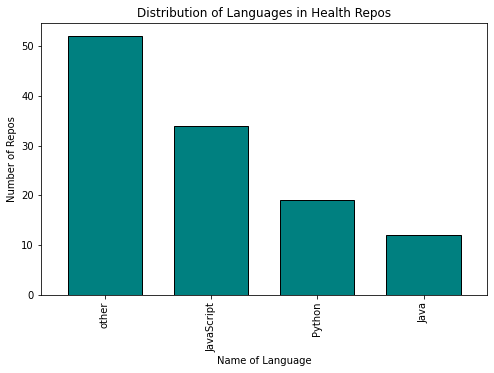

In [4]:
fig = plt.figure(figsize=(8, 5))

ax = df.language.value_counts().plot.bar(width=.7, ec='black', color='teal')
ax.set(title='Distribution of Languages in Health Repos', ylabel='Number of Repos', xlabel='Name of Language')
plt.savefig("Dist.png")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   language          117 non-null    object
 1   readme_contents   117 non-null    object
 2   clean             117 non-null    object
 3   clean_stemmed     117 non-null    object
 4   clean_lemmatized  117 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [6]:
df.shape

(117, 5)

In [7]:
words = ' '.join(df.clean_lemmatized)
words

"nutrition nutrition highly configurable mod enable creation health system minecraft downloadhttpsgithubcomwescooknutritionreleases wikihttpsgithubcomwescooknutritionwiki changelogchangelogmd nutrition guiscreenshotsguipng nutrition gui config fileshttpsgithubcomwescooknutritionwikiconfiguration nutrition allows define custom food group called nutrientshttpsgithubcomwescooknutritionwikinutrients apply effectshttpsgithubcomwescooknutritionwikieffects based nutrition level default nutrition come configured classic five food group system dairy fruit grain protein vegetable however many different system possible example include spicy tolerance bar eating enough spicy food grant permanent resistance fire zombie simulation must eat brain avoid negative effect gluten intolerance eat bread get sick updating mod please delete confignutritionnutrients directory receive new mod support necessary ' overwrite customizations mod supported mod supported default fivefood group system include abyssalcr

In [8]:
# list of all words
words_list = words.split()
words_list

['nutrition',
 'nutrition',
 'highly',
 'configurable',
 'mod',
 'enable',
 'creation',
 'health',
 'system',
 'minecraft',
 'downloadhttpsgithubcomwescooknutritionreleases',
 'wikihttpsgithubcomwescooknutritionwiki',
 'changelogchangelogmd',
 'nutrition',
 'guiscreenshotsguipng',
 'nutrition',
 'gui',
 'config',
 'fileshttpsgithubcomwescooknutritionwikiconfiguration',
 'nutrition',
 'allows',
 'define',
 'custom',
 'food',
 'group',
 'called',
 'nutrientshttpsgithubcomwescooknutritionwikinutrients',
 'apply',
 'effectshttpsgithubcomwescooknutritionwikieffects',
 'based',
 'nutrition',
 'level',
 'default',
 'nutrition',
 'come',
 'configured',
 'classic',
 'five',
 'food',
 'group',
 'system',
 'dairy',
 'fruit',
 'grain',
 'protein',
 'vegetable',
 'however',
 'many',
 'different',
 'system',
 'possible',
 'example',
 'include',
 'spicy',
 'tolerance',
 'bar',
 'eating',
 'enough',
 'spicy',
 'food',
 'grant',
 'permanent',
 'resistance',
 'fire',
 'zombie',
 'simulation',
 'must',
 

In [9]:
all_words = pd.Series(words_list).value_counts().reset_index()
all_words.columns=['word','count']
all_words = all_words.drop([0,2,5,12])

In [10]:
all_words.head(5)

,word,count
1,food,351
3,nutrition,218
4,user,205
6,data,191
7,gram,162


**What are the top 10 words for all repos?**

In [11]:
top_10_all_words = all_words.sort_values(by='count', ascending=False).head(10)
top_10_all_words

,word,count
1,food,351
3,nutrition,218
4,user,205
6,data,191
7,gram,162
8,recipe,151
9,use,146
10,app,145
11,database,137
13,file,131


In [12]:
# IDF vs common words

In [13]:
docs = [doc for doc in df.clean_lemmatized]

In [14]:
def idf(word):
    '''A simple way to calculate idf for demonstration. Note that this 
    function relies on a globally defined blogs variable.'''
    n_occurences = sum([1 for doc in docs if word in doc])
    return len(docs) / n_occurences



In [15]:
common_words = np.array(['food', 'nutrition', 'user', 'data', 'gram', 'recipe','use','app','database','file'])
common_words

array(['food', 'nutrition', 'user', 'data', 'gram', 'recipe', 'use',
       'app', 'database', 'file'], dtype='<U9')

In [16]:
# put the unique words into a data frame
words_idf = (pd.DataFrame(dict(words=common_words))
             
 # calculate the idf for each word
 .assign(idf=lambda train: train.words.apply(idf))
             
 # sort the data for presentation purposes
 .set_index('words')
 .sort_values(by='idf', ascending=True))

In [17]:
words_idf

,idf
words,
nutrition,1.181818
use,1.314607
app,1.344828
data,1.647887
food,1.720588
file,1.918033
user,2.489362
database,2.659091
gram,5.850000


In [18]:
words_idf.reset_index(inplace=True)


In [19]:
words_idf

,words,idf
0,nutrition,1.181818
1,use,1.314607
2,app,1.344828
3,data,1.647887
4,food,1.720588
5,file,1.918033
6,user,2.489362
7,database,2.659091
8,gram,5.850000
9,recipe,6.157895


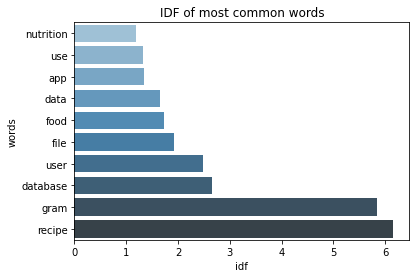

In [20]:
sns.barplot(data=words_idf, x='idf', y='words', palette="Blues_d")
plt.title('IDF of most common words')
plt.show()

### Question: What does the distribution of IDFs look like for the most common words?

**Takeaways:**

    - Using the top 10 most common words calculated in Question 1, we calculated the IDF values for each of our top 10 most common words.
    
    - The words in the top 10 with the highest IDF value were "recipe", "gram", "database", and "user".

**Language VS word count**

In [21]:
#Let's break the data up into seperate pieces:

#The words that appear in repos labeled other, Javascript, Python, Java.
#All of the words.


all_words = ' '.join(df.clean_lemmatized)
other = ' '.join(df[df.language == 'other'].clean_lemmatized)
JavaScript = ' '.join(df[df.language == 'JavaScript'].clean_lemmatized)
Python = ' '.join(df[df.language == 'Python'].clean_lemmatized)
Java = ' '.join(df[df.language == 'Java'].clean_lemmatized)


Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how often each of the words occurs.



In [22]:
# What are the top words
TopAll = pd.Series(all_words.split()).value_counts().head(10)
TopAll

'            1221
food          351
&#9;          349
nutrition     218
user          205
1             201
data          191
gram          162
recipe        151
use           146
dtype: int64

In [23]:
# What are the top JavaScript words
TopJavaScript = pd.Series(JavaScript.split()).value_counts().head(10)
TopJavaScript

'            122
user          80
food          77
nutrition     76
data          57
sample        53
1             46
project       44
file          41
value         40
dtype: int64

In [24]:
# What are the top Python words
TopPython = pd.Series(Python.split()).value_counts().head(10)
TopPython

'             825
&#9;          310
gram          145
u              94
recipe         84
food           71
ingredient     67
data           50
use            42
name           41
dtype: int64

In [25]:
# What are the top Java words
TopJava = pd.Series(Java.split()).value_counts().head(10)
TopJava

android      42
app          32
mobile       25
device       23
cordova      23
nutrition    22
run          21
new          20
build        20
'            19
dtype: int64

In [26]:
# what are the top other words
TopOther = pd.Series(other.split()).value_counts().head(10)

TopOther

'            255
food         190
1            128
nutrition     97
user          88
data          79
database      75
app           68
open          64
use           62
dtype: int64

In [27]:
# Now we'll combine these three together to get one resulting data frame that we can work with:


word_counts = (pd.concat([TopAll, TopJavaScript, TopPython, TopJava, TopOther], axis=1, sort=True)
                .set_axis(['All', 'JavaScript', 'Python', 'Java', 'Other'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,All,JavaScript,Python,Java,Other
&#9;,349,0,310,0,0
',1221,122,825,19,255
1,201,46,0,0,128
android,0,0,0,42,0
app,0,0,0,32,68


In [28]:
# most frequently occuring words?

word_counts.sort_values(by='All', ascending=False).head(10)


,All,JavaScript,Python,Java,Other
',1221,122,825,19,255
food,351,77,71,0,190
&#9;,349,0,310,0,0
nutrition,218,76,0,22,97
user,205,80,0,0,88
1,201,46,0,0,128
data,191,57,50,0,79
gram,162,0,145,0,0
recipe,151,0,84,0,0
use,146,0,42,0,62


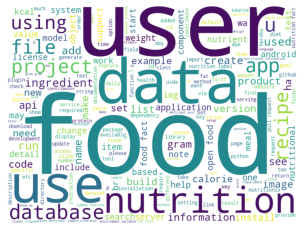

In [29]:
img = WordCloud(background_color='white', width=800, height=600).generate(all_words)
plt.imshow(img)
plt.axis('off');

In [65]:
df = pd.read_csv('nutrition_repos_clean_stemmed_lemmatize.csv')
df.head()

,language,readme_contents,clean,clean_stemmed,clean_lemmatized
0,Java,# Nutrition\n\nNutrition is a highly configura...,nutrition\n\nnutrition is a highly configurabl...,nutrit nutrit highli configur mod enabl creati...,nutrition nutrition highly configurable mod en...
1,Java,\n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP \n\n仓库地址: htt...,app \n\n httpsgithubcomwangtianruinutritionmas...,app httpsgithubcomwangtianruinutritionmast api...,app httpsgithubcomwangtianruinutritionmaster a...
2,JavaScript,Nutrition Label jQuery Plugin by Nutritionix\r...,nutrition label jquery plugin by nutritionix\r...,nutrit label jqueri plugin nutritionix npmhttp...,nutrition label jquery plugin nutritionix npmh...
3,other,\n# off-nutrition-table-extractor\nThis reposi...,offnutritiontableextractor\nthis repository is...,offnutritiontableextractor thi repositori accu...,offnutritiontableextractor repository accumula...
4,Python,"﻿# wger\n<img src=""https://raw.githubuserconte...",wger\nimg srchttpsrawgithubusercontentcomwgerp...,wger img srchttpsrawgithubusercontentcomwgerpr...,wger img srchttpsrawgithubusercontentcomwgerpr...


In [66]:
health = pd.DataFrame({'raw_count':df.value_counts()})
health

raw_count
language   readme_contents                                    clean                                              clean_stemmed                                      clean_lemmatized                                             
JavaScript # NutritionIQ\nNutritionIQ is a machine-learnin... nutritioniq\nnutritioniq is a machinelearning b... nutritioniq nutritioniq machinelearn base recei... nutritioniq nutritioniq machinelearning based r...          2
Java       \n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP  \n\n仓库地址: http... app \n\n httpsgithubcomwangtianruinutritionmast... app httpsgithubcomwangtianruinutritionmast api ... app httpsgithubcomwangtianruinutritionmaster ap...          1
other      # Flutter-Nutrition-Application ( WIP )\n\n\n##... flutternutritionapplication wip \n\n\n notable ... flutternutritionappl wip notabl link flutter in... flutternutritionapplication wip notable link fl...          1
           # NutritionCal\n\nNutrition Diary is a food and... nutritioncal\n\nnutrition diary is a food and n... nutritionc nutrit diari food nutrit app help ea... nutritioncal nutrition diary food nutrition app...          1
           # Nutrition-Expert-System-Gestational-Diabetes     nutritionexpertsystemgestationaldiabetes           nutritionexpertsystemgestationaldiabet             nutritionexpertsystemgestationaldiabetes                    1
...                                                                                                                                                                                                                           ...
JavaScript ##**Updated Ionic2 version of this sample appli... updated ionic2 version of this sample applicati... updat ionic2 version thi sampl applic avail htt... updated ionic2 version sample application avail...          1
           # healthTracker\n\nWe designed this simple heal... healthtracker\n\nwe designed this simple health... healthtrack design thi simpl health applic help... healthtracker designed simple health applicatio...          1
           # food-search\n\n> Discover the nutritional inf... foodsearch\n\n discover the nutritional informa... foodsearch discov nutrit inform 700000 food foo... foodsearch discover nutritional information 700...          1
           # csci-3308-Project-GroupAwesome\n\nProject Nam... csci3308projectgroupawesome\n\nproject name fee... csci3308projectgroupawesom project name feedmew... csci3308projectgroupawesome project name feedme...          1
other      ﻿Recipe Analyzer - Marissa Berresford\nCurrent ... recipe analyzer marissa berresford\ncurrent sta... recip analyz marissa berresford current statu 2... recipe analyzer marissa berresford current stat...          1

[116 rows x 1 columns]

In [67]:
health['frequency'] = health.raw_count.apply(lambda x: x/health.raw_count.sum())
health

raw_count  \
language   readme_contents                                    clean                                              clean_stemmed                                      clean_lemmatized                                                
JavaScript # NutritionIQ\nNutritionIQ is a machine-learnin... nutritioniq\nnutritioniq is a machinelearning b... nutritioniq nutritioniq machinelearn base recei... nutritioniq nutritioniq machinelearning based r...          2   
Java       \n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP  \n\n仓库地址: http... app \n\n httpsgithubcomwangtianruinutritionmast... app httpsgithubcomwangtianruinutritionmast api ... app httpsgithubcomwangtianruinutritionmaster ap...          1   
other      # Flutter-Nutrition-Application ( WIP )\n\n\n##... flutternutritionapplication wip \n\n\n notable ... flutternutritionappl wip notabl link flutter in... flutternutritionapplication wip notable link fl...          1   
           # NutritionCal\n\nNutrition Diary is a food and... nutritioncal\n\nnutrition diary is a food and n... nutritionc nutrit diari food nutrit app help ea... nutritioncal nutrition diary food nutrition app...          1   
           # Nutrition-Expert-System-Gestational-Diabetes     nutritionexpertsystemgestationaldiabetes           nutritionexpertsystemgestationaldiabet             nutritionexpertsystemgestationaldiabetes                    1   
...                                                                                                                                                                                                                           ...   
JavaScript ##**Updated Ionic2 version of this sample appli... updated ionic2 version of this sample applicati... updat ionic2 version thi sampl applic avail htt... updated ionic2 version sample application avail...          1   
           # healthTracker\n\nWe designed this simple heal... healthtracker\n\nwe designed this simple health... healthtrack design thi simpl health applic help... healthtracker designed simple health applicatio...          1   
           # food-search\n\n> Discover the nutritional inf... foodsearch\n\n discover the nutritional informa... foodsearch discov nutrit inform 700000 food foo... foodsearch discover nutritional information 700...          1   
           # csci-3308-Project-GroupAwesome\n\nProject Nam... csci3308projectgroupawesome\n\nproject name fee... csci3308projectgroupawesom project name feedmew... csci3308projectgroupawesome project name feedme...          1   
other      ﻿Recipe Analyzer - Marissa Berresford\nCurrent ... recipe analyzer marissa berresford\ncurrent sta... recip analyz marissa berresford current statu 2... recipe analyzer marissa berresford current stat...          1   

                                                                                                                                                                                                                        frequency  
language   readme_contents                                    clean                                              clean_stemmed                                      clean_lemmatized                                               
JavaScript # NutritionIQ\nNutritionIQ is a machine-learnin... nutritioniq\nnutritioniq is a machinelearning b... nutritioniq nutritioniq machinelearn base recei... nutritioniq nutritioniq machinelearning based r...   0.017094  
Java       \n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP  \n\n仓库地址: http... app \n\n httpsgithubcomwangtianruinutritionmast... app httpsgithubcomwangtianruinutritionmast api ... app httpsgithubcomwangtianruinutritionmaster ap...   0.008547  
other      # Flutter-Nutrition-Application ( WIP )\n\n\n##... flutternutritionapplication wip \n\n\n notable ... flutternutritionappl wip notabl link flutter in... flutternutritionapplication wip notable link fl...   0.008547  
           # NutritionCal\n\nNutrition Diary is a food and... nutritioncal\n\nnutrition diary is a

In [68]:
health['augmented_frequency'] = health.frequency.apply(lambda x: x/health.frequency.max())
health

raw_count  \
language   readme_contents                                    clean                                              clean_stemmed                                      clean_lemmatized                                                
JavaScript # NutritionIQ\nNutritionIQ is a machine-learnin... nutritioniq\nnutritioniq is a machinelearning b... nutritioniq nutritioniq machinelearn base recei... nutritioniq nutritioniq machinelearning based r...          2   
Java       \n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP  \n\n仓库地址: http... app \n\n httpsgithubcomwangtianruinutritionmast... app httpsgithubcomwangtianruinutritionmast api ... app httpsgithubcomwangtianruinutritionmaster ap...          1   
other      # Flutter-Nutrition-Application ( WIP )\n\n\n##... flutternutritionapplication wip \n\n\n notable ... flutternutritionappl wip notabl link flutter in... flutternutritionapplication wip notable link fl...          1   
           # NutritionCal\n\nNutrition Diary is a food and... nutritioncal\n\nnutrition diary is a food and n... nutritionc nutrit diari food nutrit app help ea... nutritioncal nutrition diary food nutrition app...          1   
           # Nutrition-Expert-System-Gestational-Diabetes     nutritionexpertsystemgestationaldiabetes           nutritionexpertsystemgestationaldiabet             nutritionexpertsystemgestationaldiabetes                    1   
...                                                                                                                                                                                                                           ...   
JavaScript ##**Updated Ionic2 version of this sample appli... updated ionic2 version of this sample applicati... updat ionic2 version thi sampl applic avail htt... updated ionic2 version sample application avail...          1   
           # healthTracker\n\nWe designed this simple heal... healthtracker\n\nwe designed this simple health... healthtrack design thi simpl health applic help... healthtracker designed simple health applicatio...          1   
           # food-search\n\n> Discover the nutritional inf... foodsearch\n\n discover the nutritional informa... foodsearch discov nutrit inform 700000 food foo... foodsearch discover nutritional information 700...          1   
           # csci-3308-Project-GroupAwesome\n\nProject Nam... csci3308projectgroupawesome\n\nproject name fee... csci3308projectgroupawesom project name feedmew... csci3308projectgroupawesome project name feedme...          1   
other      ﻿Recipe Analyzer - Marissa Berresford\nCurrent ... recipe analyzer marissa berresford\ncurrent sta... recip analyz marissa berresford current statu 2... recipe analyzer marissa berresford current stat...          1   

                                                                                                                                                                                                                        frequency  \
language   readme_contents                                    clean                                              clean_stemmed                                      clean_lemmatized                                                
JavaScript # NutritionIQ\nNutritionIQ is a machine-learnin... nutritioniq\nnutritioniq is a machinelearning b... nutritioniq nutritioniq machinelearn base recei... nutritioniq nutritioniq machinelearning based r...   0.017094   
Java       \n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP  \n\n仓库地址: http... app \n\n httpsgithubcomwangtianruinutritionmast... app httpsgithubcomwangtianruinutritionmast api ... app httpsgithubcomwangtianruinutritionmaster ap...   0.008547   
other      # Flutter-Nutrition-Application ( WIP )\n\n\n##... flutternutritionapplication wip \n\n\n notable ... flutternutritionappl wip notabl link flutter in... flutternutritionapplication wip notable link fl...   0.008547   
           # NutritionCal\n\nNutrition Diary is a food and... nutritioncal\n\nnutrition diary

In [69]:
(pd.DataFrame({'raw_count': all_words.value_counts()})
 .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

AttributeError: 'str' object has no attribute 'value_counts'

## IDF: Inverse Document Frequency

Inverse Document Frequency also provides information about individual words, but, in order to use this measure, we must have multiple documents, i.e. several different bodies of text.

Inverse Document Frequency tells us how much **information** a word provides. It is based on how commonly a word appears across multiple documents. The metric is divised such that the more frequently a word appears, the lower the IDF for that word will be.

      idf(word) = log(# of documents / # of documents containing word)
      
> If a given word doesn't appear in any documents, the denominator in the equation above would be zero, so some definitions of idf will add 1 to the denominator.

For example, imagine we have 20 documents. We can visualize what the idf score looks like with the code below:

- **IDF**: Inverse Document Frequency; a measure of how many (related) documents contain a particular word. 

        "apple" is found in 10 of the 58 documents in our sample




Text(0.5, 1.0, 'IDF for a given word')

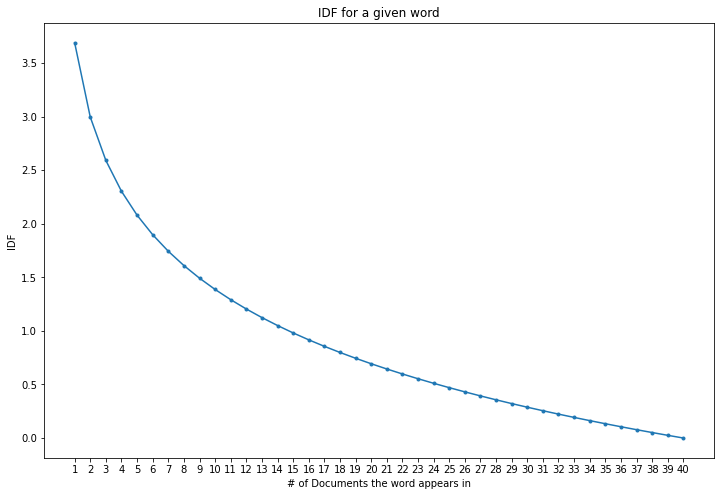

In [34]:
n_documents = 40

x = np.arange(1, n_documents + 1)
y = np.log(n_documents / x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, marker='.')

plt.xticks(x)
plt.xlabel('# of Documents the word appears in')
plt.ylabel('IDF')
plt.title('IDF for a given word')

In [35]:
df = pd.read_csv('nutrition_repos_clean_stemmed_lemmatize.csv')
df.head()

,language,readme_contents,clean,clean_stemmed,clean_lemmatized
0,Java,# Nutrition\n\nNutrition is a highly configura...,nutrition\n\nnutrition is a highly configurabl...,nutrit nutrit highli configur mod enabl creati...,nutrition nutrition highly configurable mod en...
1,Java,\n## 营养大师\n\n一款基于数据分析的智能饮食推荐APP \n\n仓库地址: htt...,app \n\n httpsgithubcomwangtianruinutritionmas...,app httpsgithubcomwangtianruinutritionmast api...,app httpsgithubcomwangtianruinutritionmaster a...
2,JavaScript,Nutrition Label jQuery Plugin by Nutritionix\r...,nutrition label jquery plugin by nutritionix\r...,nutrit label jqueri plugin nutritionix npmhttp...,nutrition label jquery plugin nutritionix npmh...
3,other,\n# off-nutrition-table-extractor\nThis reposi...,offnutritiontableextractor\nthis repository is...,offnutritiontableextractor thi repositori accu...,offnutritiontableextractor repository accumula...
4,Python,"﻿# wger\n<img src=""https://raw.githubuserconte...",wger\nimg srchttpsrawgithubusercontentcomwgerp...,wger img srchttpsrawgithubusercontentcomwgerpr...,wger img srchttpsrawgithubusercontentcomwgerpr...


In [36]:
readmes = [readme for readme in df.clean_lemmatized]


In [37]:
def idf(word):
    '''A simple way to calculate idf for demonstration. Note that this 
    function relies on a globally defined blogs variable.'''
    n_occurences = sum([1 for doc in readmes if word in doc])
    return len(readmes) / n_occurences


In [38]:
unique_words = pd.Series(' '.join(readmes).split()).unique()
unique_words

array(['nutrition', 'highly', 'configurable', ...,
       'httpswwwpivotaltrackercomnprojects1342872',
       'httpswwwfluiduicomeditorlivepreviewpc8q7gdmtcopdb6e77aviqfxwkmgipblt1447357197567',
       'fanta'], dtype=object)

In [39]:
# put the unique words into a data frame
words_idf = (pd.DataFrame(dict(word=unique_words))
             
 # calculate the idf for each word
 .assign(idf=lambda train: train.word.apply(idf))
             
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False))

In [40]:
 words_idf.sort_values(by='idf', ascending=True).head()

,idf
word,
n,1.000000
r,1.008621
e,1.017391
u,1.017391
l,1.017391


In [41]:
words_idf.describe()



,idf
count,7259.000000
mean,82.841531
std,44.416039
min,1.000000
25%,39.000000
50%,117.000000
75%,117.000000
max,117.000000


In [42]:
#BREAK

In [43]:
JavaScript = ' '.join(df[df.language == 'JavaScript'].clean_lemmatized)
Python = ' '.join(df[df.language == 'Python'].clean_lemmatized)
Java = ' '.join(df[df.language == 'Java'].clean_lemmatized)
all_words = ' '.join(df.clean_lemmatized)

In [44]:
JavaScript_freq = pd.Series(JavaScript.split()).value_counts()
Python_freq = pd.Series(Python.split()).value_counts()
Java_freq = pd.Series(Java.split()).value_counts()
 




all_freq = pd.Series(all_words.split()).value_counts()

In [45]:
JavaScript_freq

'                                       122
user                                     80
food                                     77
nutrition                                76
data                                     57
                                       ... 
httpstwittercomizzyz                      1
element                                   1
obsessing                                 1
length                                    1
charthttpjsfiddlenetmbeasley183dbxhl      1
Length: 2383, dtype: int64

In [46]:
word_counts = pd.concat([JavaScript_freq, Python_freq, Java_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['JavaScript', 'Python', 'Java','all']
word_counts.head()

,JavaScript,Python,Java,all
',122,825,19,1221
user,80,27,10,205
food,77,71,13,351
nutrition,76,23,22,218
data,57,50,5,191


In [47]:
word_counts.sort_values('all', ascending=False).head(20)

,JavaScript,Python,Java,all
',122,825,19,1221
food,77,71,13,351
&#9;,11,310,9,349
nutrition,76,23,22,218
user,80,27,10,205
1,46,20,7,201
data,57,50,5,191
gram,0,145,0,162
recipe,25,84,2,151
use,30,42,12,146


In [48]:
word_count = word_counts.sort_values('all', ascending=False).head(20)

Text(0.5, 1.0, 'count for the top 10 most frequent words')

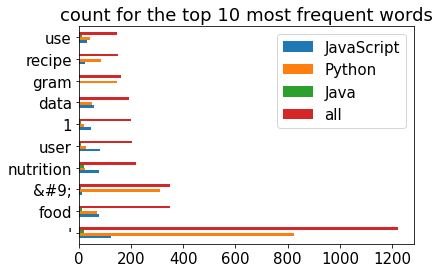

In [49]:
plt.rc('font', size=15)
word_counts.sort_values('all', ascending=False).head(10)[['JavaScript', 'Python', 'Java', 'all']].plot.barh()
plt.title('count for the top 10 most frequent words')

# Modeling

### Baseline

In [50]:
# establish baseline

baseline = pd.DataFrame(df.language)
baseline['baseline'] = 'other'

In [51]:
baseline

,language,baseline
0,Java,other
1,Java,other
2,JavaScript,other
3,other,other
4,Python,other
...,...,...
112,other,other
113,other,other
114,other,other
115,JavaScript,other


In [52]:
# establish baseline accuracy

baseline_accuracy = round((baseline.language == baseline.baseline).mean(),2)
baseline_accuracy

0.44

In [53]:
import pandas as pd
df = pd.read_csv("nutrition_repos_clean_stemmed_lemmatize.csv")

sgs = SplitGetScale()
train, test = sgs.split(df)

In [54]:
(X_train_stemmed, y_train_stemmed), (X_test_stemmed, y_test_stemmed) = sgs.get_Xy(train, test, cols_train="clean_stemmed")
(X_train_lemmed, y_train_lemmed), (X_test_lemmed, y_test_lemmed) = sgs.get_Xy(train, test, cols_train="clean_lemmatized")

In [55]:
train.shape, test.shape

((93, 5), (24, 5))

In [56]:
y_train_lemmed.shape, y_test_lemmed.shape


((93,), (24,))

In [57]:
#KNN

# Create the object
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform')

#Fit the model
knn.fit(X_train_stemmed, y_train_stemmed)

KNeighborsClassifier(n_neighbors=4)

In [58]:
#Make predictions on train
y_train_pred = knn.predict(X_train_stemmed)

#Estimate probability
y_train_pred_proba = knn.predict_proba(X_train_stemmed)

#Evaluate on accuracy
print('Accuracy of KNN classifier on training set: {:.3f}'
     .format(knn.score(X_train_stemmed, y_train_stemmed)))
# assign accuracy to variable to call later
knn_train_accuracy = knn.score(X_train_stemmed, y_train_stemmed)


Accuracy of KNN classifier on training set: 0.645


In [59]:
#Make predictions on validate
y_validate_pred = knn.predict(X_test_stemmed)

#Estimate probability
y_validate_pred_proba = knn.predict_proba(X_test_stemmed)

#Evaluate on accuracy
print('Accuracy of KNN classifier on test set: {:.3f}'
     .format(knn.score(X_test_stemmed, y_test_stemmed)))

# assign accuracy to variable to call later
knn_test_accuracy = round(knn.score(X_test_stemmed, y_test_stemmed),3)

Accuracy of KNN classifier on test set: 0.333


In [60]:
#lemmatized